In [ ]:
#Convolutional Neural Network
"""
Problem Type: Multi-class classification
Image size:   28x28
Samples:      60000
Input size:   60000 x 1 x 28 x 28
Convolutional Network Configuration:
    Number of RGB channels:                1
    Layers of CNN:                         1(simple CNN) 
    Number of filters:                     32
    Size of filters:                       7x7
    Polling Method used:                   Max-Polling
    Polling Size:                          2x2
    Layers of MLP:                         2
    Number of nodes in input MLP layer:    128
    Number of nodes in output MLP layer:   10
    Dropout percent:                       20%
    Activation function:                   Relu and Softmax(Output layer)
    Number of epochs:                      10
    Batch Size:                            200
"""

Using TensorFlow backend.


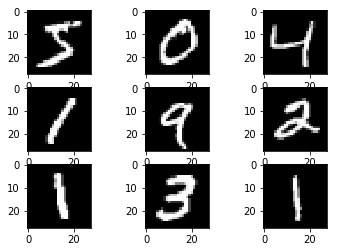

In [1]:
# Plot of images  
from keras.datasets import mnist 
from matplotlib import pyplot as plt

# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# create a grid of 3x3 images 
for i in range(0, 9): 
    plt.subplot(331 + i) 
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [2]:
# Simple CNN 

import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# fix dimension ordering issue
from keras import backend as K
K.set_image_dim_ordering('th')
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][channels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define a simple CNN model
def CNN_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (7, 7), input_shape=(1, 28, 28), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

# build the model
model = CNN_model()

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 111s - loss: 0.2258 - acc: 0.9355 - val_loss: 0.0718 - val_acc: 0.9785
Epoch 2/10
60000/60000 [==============================] - 110s - loss: 0.0685 - acc: 0.9798 - val_loss: 0.0460 - val_acc: 0.9846
Epoch 3/10
60000/60000 [==============================] - 110s - loss: 0.0493 - acc: 0.9850 - val_loss: 0.0390 - val_acc: 0.9882
Epoch 4/10
60000/60000 [==============================] - 110s - loss: 0.0380 - acc: 0.9881 - val_loss: 0.0387 - val_acc: 0.9872
Epoch 5/10
60000/60000 [==============================] - 110s - loss: 0.0320 - acc: 0.9898 - val_loss: 0.0329 - val_acc: 0.9893
Epoch 6/10
60000/60000 [==============================] - 109s - loss: 0.0251 - acc: 0.9922 - val_loss: 0.0303 - val_acc: 0.9908
Epoch 7/10
60000/60000 [==============================] - 110s - loss: 0.0218 - acc: 0.9931 - val_loss: 0.0313 - val_acc: 0.9905
Epoch 8/10
60000/60000 [=======================

In [3]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 22, 22)        1600      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 11, 11)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 11, 11)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               495744    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 498,634
Trainable params: 498,634
Non-trainable params: 0
_________________________________________________________________
None

In [4]:
history.history.keys()

dict_keys(['loss', 'val_acc', 'acc', 'val_loss'])

dict_keys(['loss', 'val_acc', 'acc', 'val_loss'])


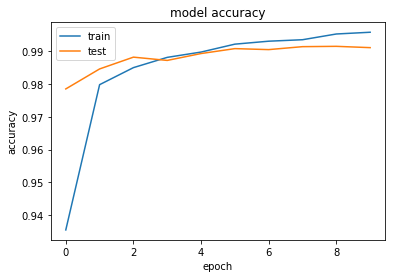

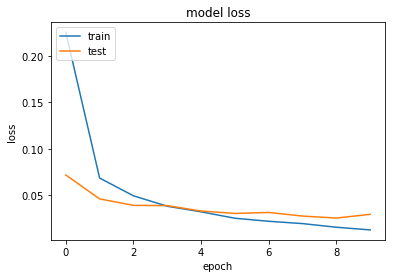

In [5]:
from matplotlib import pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()